In [1]:
import sys
sys.path.insert(0, '../../')

import joblib
import pandas as pd
import numpy as np

from pdpbox.info_plots import target_plot
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## test multi-class classifier

In [2]:
test_otto = joblib.load('test_otto.pkl')

otto_data = test_otto['data']
otto_features = test_otto['features']
otto_target = test_otto['target']
otto_model = test_otto['rf_model']

#### (model: multi-class, feature_type: numeric)

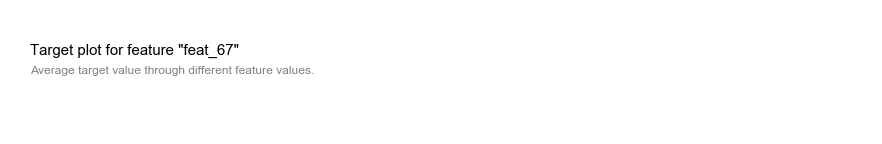

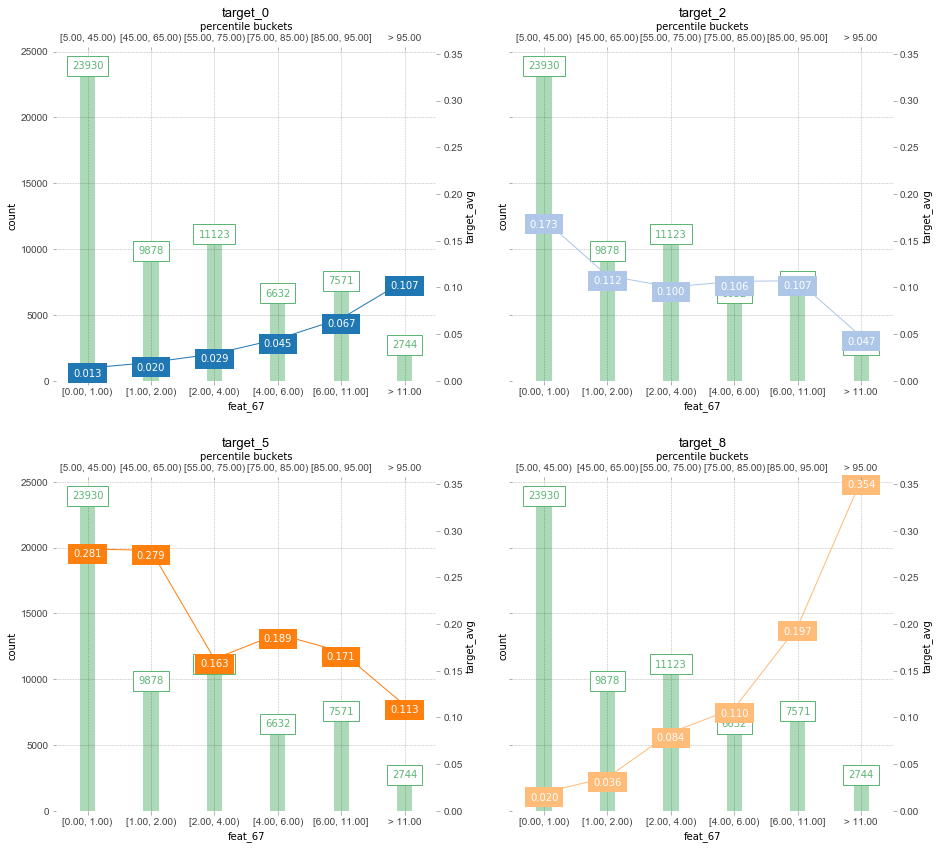

In [3]:
# default
axes, summary_df = target_plot(df=otto_data, 
                               feature='feat_67', 
                               feature_name='feat_67', 
                               target=['target_0', 'target_2', 'target_5', 'target_8'], 
                               percentile_range=(5, 95), 
                               figsize=(15, 14), 
                               show_percentile=True, 
                               show_outliers=True)

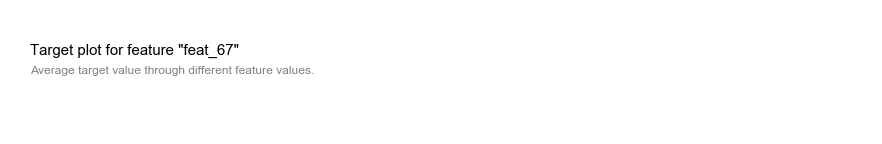

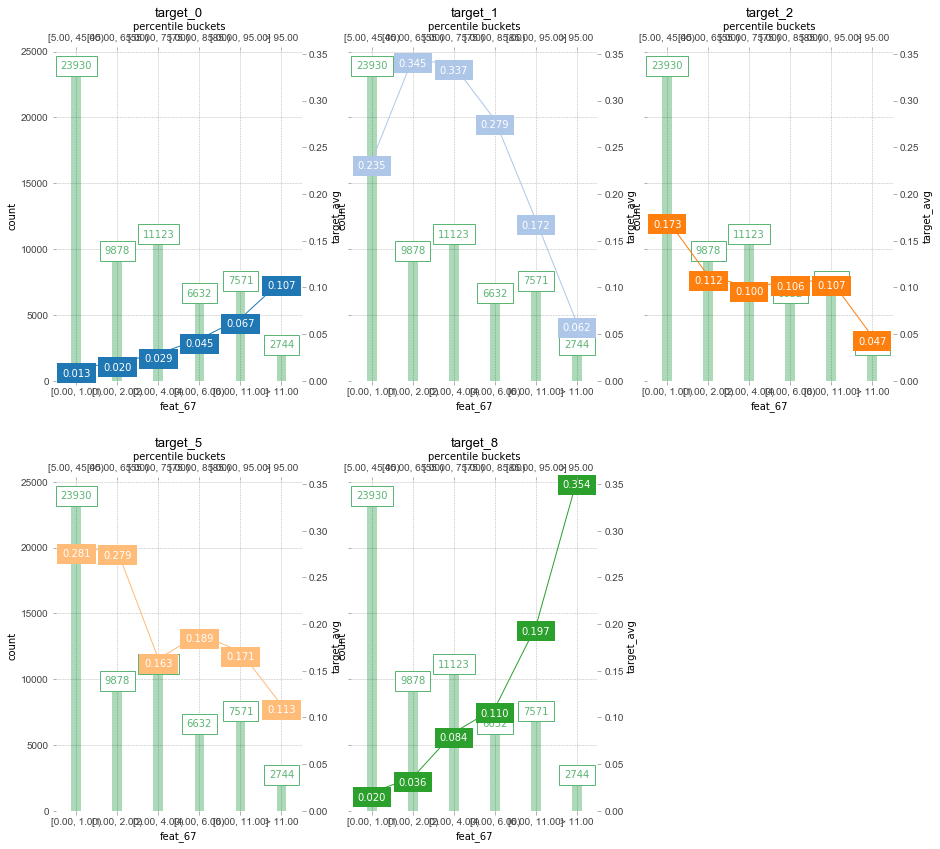

In [4]:
# ncols
axes, summary_df = target_plot(df=otto_data, 
                               feature='feat_67', 
                               feature_name='feat_67', 
                               target=['target_0', 'target_1', 'target_2', 'target_5', 'target_8'], 
                               percentile_range=(5, 95), 
                               figsize=(15, 14), 
                               show_percentile=True, 
                               show_outliers=True, 
                               ncols=3)

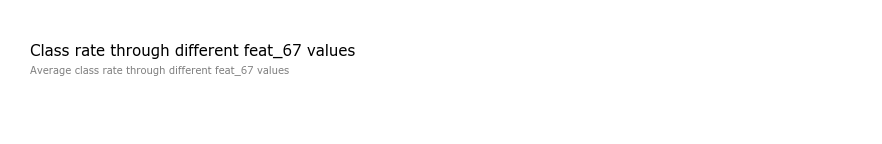

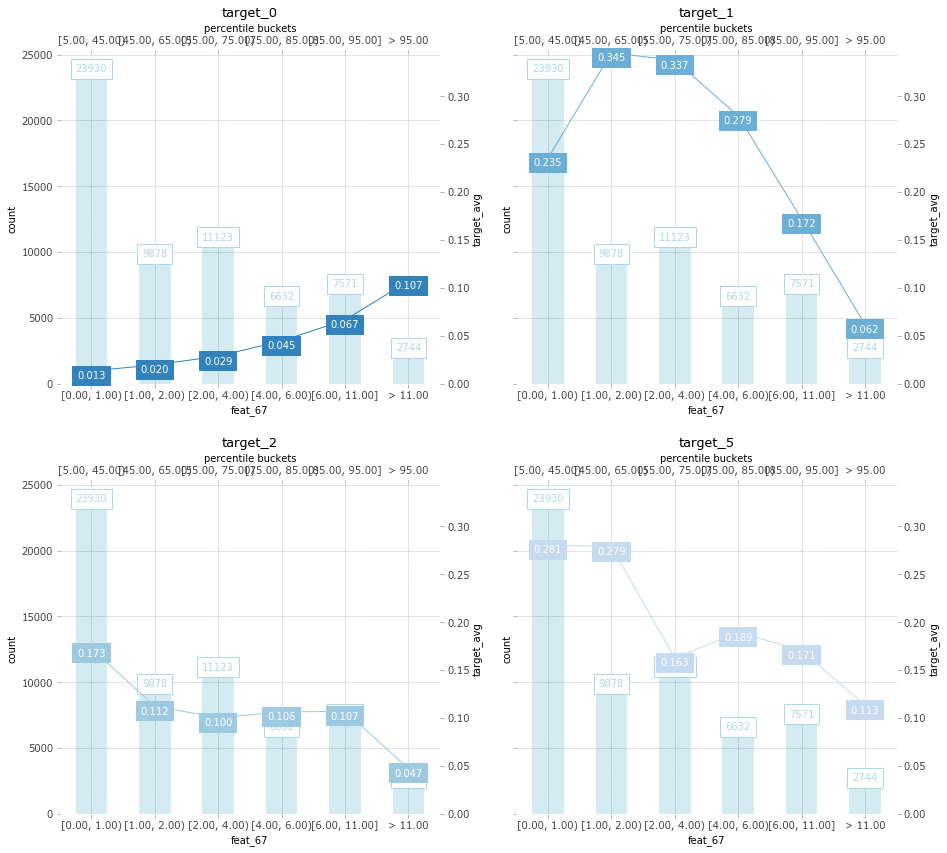

In [5]:
# plot_params
plot_params = {
    'font_family': 'Verdana',
    'title': 'Class rate through different feat_67 values',
    'subtitle': 'Average class rate through different feat_67 values',
    'title_fontsize': 15,
    'subtitle_fontsize': 10,
    'line_width': 1,
    'line_color': '#3288bd',
    'line_colors_cmap': 'tab20c',
    #'line_colors': ['blue', 'green', 'pink', 'red', 'orange'],
    'bar_color': 'lightblue',
    'bar_width': 0.5,
    'xticks_rotation': 0
}

axes, summary_df = target_plot(df=otto_data, 
                               feature='feat_67', 
                               feature_name='feat_67', 
                               target=['target_0', 'target_1', 'target_2', 'target_5', ], 
                               percentile_range=(5, 95), 
                               figsize=(15, 14), 
                               show_percentile=True, 
                               show_outliers=True, 
                               plot_params=plot_params)